In [21]:
import pandas as pd
from matplotlib import pyplot as plt
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

In [10]:
location = "freq_kata.csv"

In [11]:
df = pd.read_csv(location)

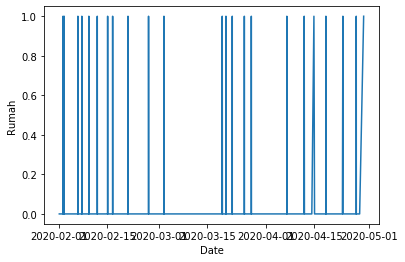

In [15]:
df = pd.read_csv(location, parse_dates = ['created_at'], index_col = ['created_at'])
df.drop(df.columns[0], axis=1, inplace=True)
plt.xlabel('Date')
plt.ylabel('Rumah')
plt.plot(df)


In [16]:
df.index = df.index.to_period('D')
df.head()

,rumah
created_at,
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0
2020-02-01,0


In [17]:
df = df.groupby('created_at').sum()
df.head()

,rumah
created_at,
2020-02-01,0
2020-02-02,2
2020-02-03,0
2020-02-04,0
2020-02-05,0


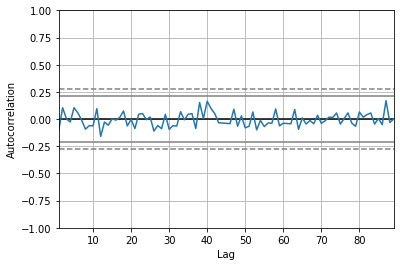

In [22]:
autocorrelation_plot(df)
plt.show()

Lag = 10

In [23]:
# fit model
model = ARIMA(df, order=(10,1,0))
model_fit = model.fit()

In [24]:
# summary of fit model
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                  rumah   No. Observations:                   89
Model:                ARIMA(10, 1, 0)   Log Likelihood                 -84.797
Date:                Fri, 16 Apr 2021   AIC                            191.593
Time:                        16:03:46   BIC                            218.844
Sample:                    02-01-2020   HQIC                           202.572
                         - 04-29-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -1.0629      0.155     -6.876      0.000      -1.366      -0.760
ar.L2         -0.7628      0.236     -3.230      0.001      -1.226      -0.300
ar.L3         -0.5863      0.254     -2.311      0.0

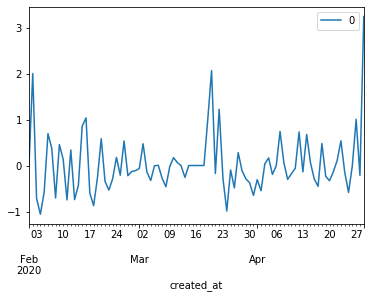

In [25]:
# line plot of residuals
residuals = pd.DataFrame(model_fit.resid)
residuals.plot()
plt.show()

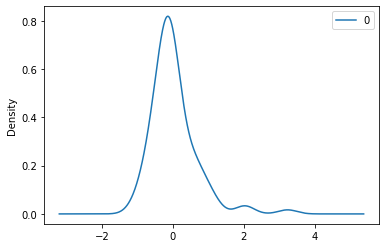

In [26]:
# density plot of residuals
residuals.plot(kind='kde')
plt.show()

In [27]:
# summary stats of residuals
print(residuals.describe())

               0
count  89.000000
mean    0.029075
std     0.653123
min    -1.058629
25%    -0.300090
50%    -0.095551
75%     0.171521
max     3.238940


# Forecasting Timeseries

Merah = predictions
Biru = expected value

predicted=-0.049406, expected=0.000000
predicted=1.083515, expected=2.000000
predicted=0.707122, expected=0.000000
predicted=1.292873, expected=0.000000
predicted=1.527727, expected=0.000000
predicted=0.692721, expected=1.000000
predicted=0.365369, expected=1.000000
predicted=0.625443, expected=0.000000
predicted=0.890724, expected=1.000000
predicted=-0.118739, expected=0.000000
predicted=1.439216, expected=0.000000
predicted=0.631638, expected=1.000000
predicted=0.561349, expected=0.000000
predicted=0.538847, expected=0.000000
predicted=0.287011, expected=1.000000
predicted=0.094551, expected=1.000000
predicted=0.515227, expected=0.000000
predicted=0.903351, expected=0.000000
predicted=0.271291, expected=0.000000
predicted=0.045809, expected=1.000000
predicted=0.433811, expected=0.000000
predicted=0.780238, expected=0.000000
predicted=0.237604, expected=0.000000
predicted=-0.000956, expected=0.000000
predicted=0.265527, expected=0.000000
predicted=0.375140, expected=1.000000
predicted

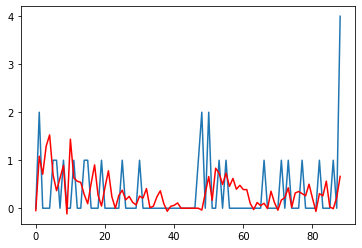

In [29]:
# split into train and test sets
X = df.values
#size = int(len(X) * 0.66)
#train, test = X[0:size], X[size:len(X)]
train, test = X, X
history = [x for x in train]
predictions = list()
# walk-forward validation
for t in range(len(test)):
	model = ARIMA(history, order=(10,1,0))
	model_fit = model.fit()
	output = model_fit.forecast()
	yhat = output[0]
	predictions.append(yhat)
	obs = test[t]
	history.append(obs)
	print('predicted=%f, expected=%f' % (yhat, obs))
# evaluate forecasts
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)
# plot forecasts against actual outcomes
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()